# Telecom Customer Churn

**Context**

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Importing the necessary libraries and input data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
%matplotlib inline
import statsmodels.api as sm
from random import sample
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from IPython.display import Image 
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
# Importing Data files
telecom=pd.read_csv('Telco-Customer-Churn.csv')

#Creating a copy of the original data
telecom_orig=telecom.copy()

In [3]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,1098-KFQEC,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## Data Preprocessing 

### Cleaning the Dataset

#### Missing Values

In [5]:
#Missing value Imputation
telecom['TotalCharges']=telecom['TotalCharges'].replace(" ", np.nan)
print("Missing Value Percentage in TotalCharges:",
      round(telecom['TotalCharges'].isnull().sum()*100/telecom['TotalCharges'].shape[0],2))

Missing Value Percentage in TotalCharges: 0.16


Since missing values are very low, we'll drop the rows

In [6]:
#Dropping rows with missing values
telecom.dropna(axis=0,subset=['TotalCharges'], inplace=True)
telecom=telecom.reset_index(drop=True)

#### Changing column dtypes

In [7]:
# Divinding dataset into id,target, numeric and categorical variables
id_col=['customerID']

target_col=['Churn']

num_cols=['tenure','MonthlyCharges', 'TotalCharges']

cat_cols=[i for i in telecom.columns if i not in id_col+target_col+num_cols]

In [8]:
#changing numerical and categorical data to their respective datatypes
telecom['Churn']=telecom['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
telecom['Churn']=telecom['Churn'].astype("category")
for i in cat_cols:
    telecom[i]=telecom[i].astype('category')
telecom[num_cols]=telecom[num_cols].apply(pd.to_numeric)

In [9]:
#Checking Dtypes
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null category
SeniorCitizen       7032 non-null category
Partner             7032 non-null category
Dependents          7032 non-null category
tenure              7032 non-null int64
PhoneService        7032 non-null category
MultipleLines       7032 non-null category
InternetService     7032 non-null category
OnlineSecurity      7032 non-null category
OnlineBackup        7032 non-null category
DeviceProtection    7032 non-null category
TechSupport         7032 non-null category
StreamingTV         7032 non-null category
StreamingMovies     7032 non-null category
Contract            7032 non-null category
PaperlessBilling    7032 non-null category
PaymentMethod       7032 non-null category
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null catego

## Exploratory Data Analysis

### Data visualisation

In [10]:
#Defining functions for to create plots
# Continuous Variables relationship with Churn
def bivariate(data, variable):
    plt.figure(i)
    plt.title('Churn_'+ variable)
    x=data[data['Churn']==1][variable].reset_index(drop=True)
    y=data[data['Churn']==0][variable].reset_index(drop=True)
    df=pd.concat([x,y], axis=1)
    df.columns=['Churn','Non-churn']
    for col in df.columns:
        sns.kdeplot(df[col], shade=True)
    
            
# Categorical Variables relationship with Churn            
def donut_plot(data, variable):
    labels = ['Non_churn', 'Churn']
    sizes = data.groupby('Churn')['Churn'].count()
    labels_var = 2*data.groupby(variable)['Churn'].count().index.tolist()
    sizes_var= data.groupby(['Churn', variable])['Churn'].count()
    colors = ['#ff9999','#66b3ff']
    colors_var=2*['darkturquoise','plum','moccasin','powderblue','salmon','y'][0:data[variable].nunique()]


    # Plot
    plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
    plt.pie(sizes_var,labels=labels_var,colors=colors_var, radius=0.65,startangle=90)
    centre_circle = plt.Circle((0,0),0.3,color='red', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title("Churn-"+variable)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

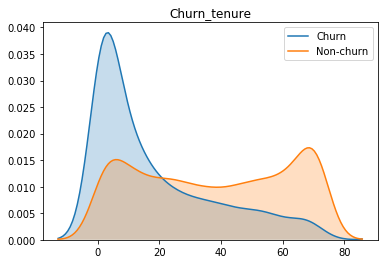

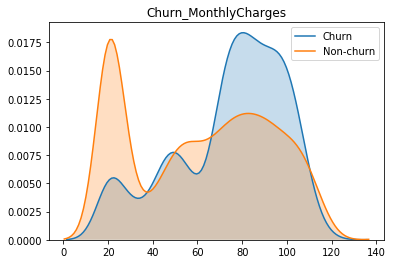

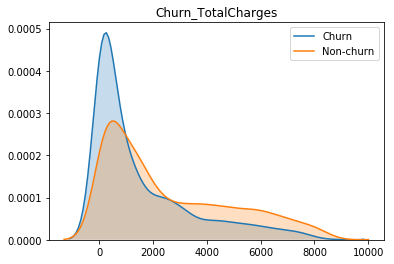

In [11]:
# Continuous Variable Plots
for i, variable in enumerate(num_cols):
    bivariate(telecom, variable)
    
    

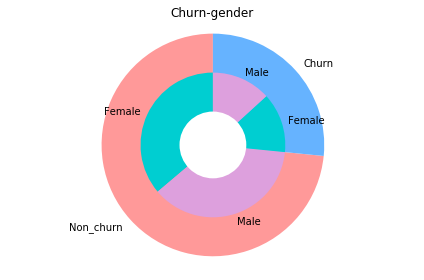

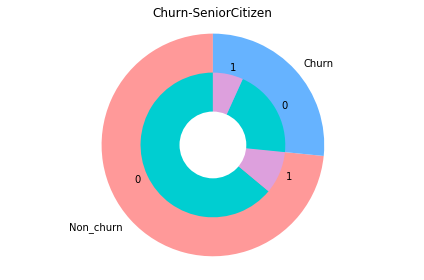

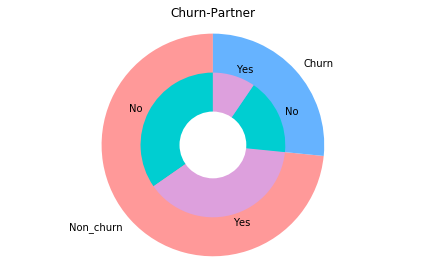

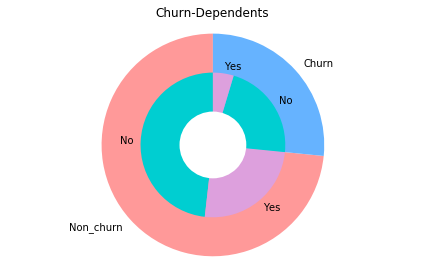

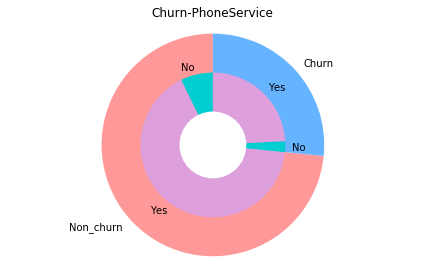

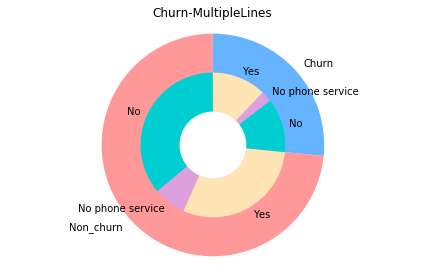

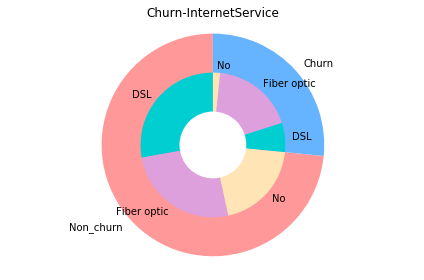

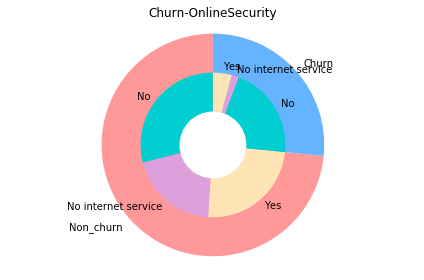

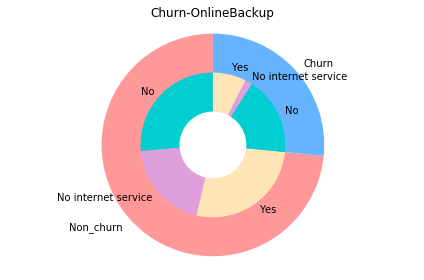

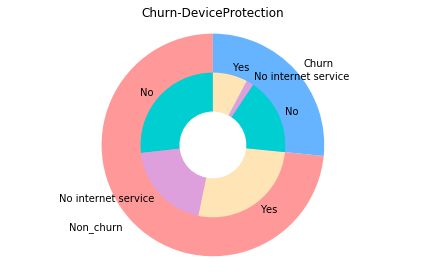

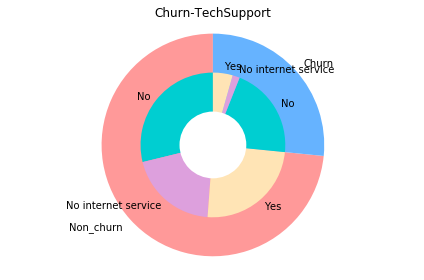

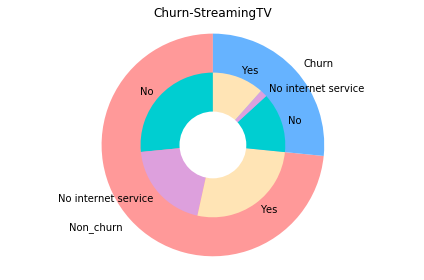

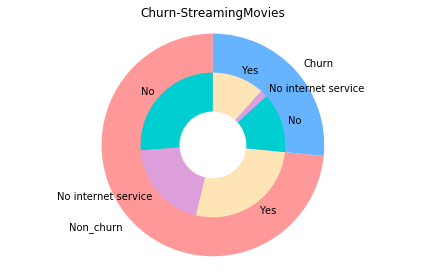

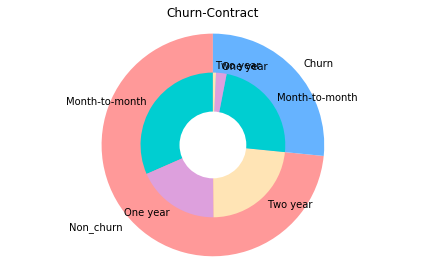

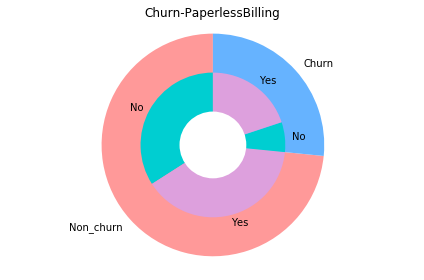

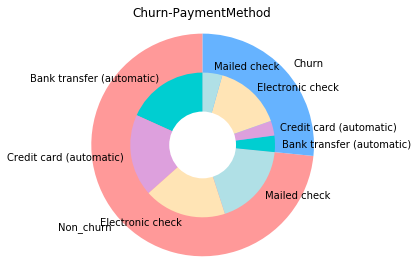

In [12]:
# Categorical Variable Plots
for i in cat_cols:
    donut_plot(telecom, i)

### Creating Dummy Variables

In [13]:
# Converting Tenure into a categorical Variable
def tenure_label(telecom) :
    
    if telecom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telecom["tenure"] > 12) & (telecom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telecom["tenure"] > 24) & (telecom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telecom["tenure"] > 48) & (telecom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telecom["tenure"] > 60 :
        return "Tenure_gt_60"
telecom["tenure_group"] = telecom.apply(lambda telecom:tenure_label(telecom),
                                      axis = 1)

In [14]:
cat_cols=cat_cols+['tenure_group']
categorical=telecom[cat_cols]
telecom.drop(cat_cols, axis=1,inplace=True)
categorical=pd.get_dummies(categorical)
telecom=pd.concat([telecom, categorical], axis=1)

In [15]:
cols_del=['gender_Female', 'SeniorCitizen_0','Partner_No','Dependents_No','PhoneService_No',
          'MultipleLines_No phone service','InternetService_No','OnlineSecurity_No internet service',
          'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service',
          'StreamingTV_No internet service','Contract_Two year','StreamingMovies_No internet service',
          'PaperlessBilling_No','PaymentMethod_Bank transfer (automatic)','tenure','tenure_group_Tenure_24-48']
telecom.drop(cols_del,1,inplace=True)

In [16]:
# Numeric Data standardisation
scaler = StandardScaler()
telecom[['MonthlyCharges','TotalCharges']] = scaler.fit_transform(telecom[['MonthlyCharges','TotalCharges']])

In [17]:
telecom.head()

,customerID,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,-1.161694,-0.994194,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
1,5575-GNVDE,-0.260878,-0.173740,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
2,3668-QPYBK,-0.363923,-0.959649,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
3,7795-CFOCW,-0.747850,-0.195248,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
4,9237-HQITU,0.196178,-0.940457,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0


## Model Building : Logistic Regression

In [18]:
#Splitting dataset into regressors and regressand
X=telecom.drop(['Churn','customerID'], axis=1)
y=telecom['Churn']

In [19]:
#Splitting data into train and test sets
X_train, X_test, y_train,  y_test= train_test_split(X, y, test_size=0.3, random_state=100)

In [20]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4922, 33)
(4922,)
(2110, 33)
(2110,)


#### First Logistic Regression Model

In [21]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4895
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.0
Date:                Sun, 23 Jun 2019   Deviance:                       4022.1
Time:                        07:12:51   Pearson chi2:                 4.94e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -7.9592      2.535     -3.140      0.002     -12.928      -2.991
MonthlyCharges                           -1.7427      1.167     -1.493      0.135      -4.030       0.545
TotalCharges                             -0.3075      0.154     -1.994      0.046      -0.610      -0.005
gender_Male                              -0.0445      0.079     -0.567      0.571      -0.199       0.109
SeniorCitizen_1                           0.4019      0.102      3.956      0.000       0.203       0.601
Partner_Yes                               0.0138      0.094      0.147      0.883      -0.170       0.197
Dependents_Yes                           -0.1338      0.107     -1.245      0.213      -0.344       0.077
PhoneService_Yes                          0.7603      0.592      1.285      0.199      -0.400       1.920
MultipleLines_No                          0.1080      0.206      0.524      0.600      -0.296       0.512
MultipleLines_Yes                         0.6523      0.395      1.653      0.098      -0.121       1.426
InternetService_DSL                      -0.5189      0.176     -2.955      0.003      -0.863      -0.175
InternetService_Fiber optic               1.8690      0.804      2.324      0.020       0.293       3.445
OnlineSecurity_No                         0.7030      0.228      3.077      0.002       0.255       1.151
OnlineSecurity_Yes                        0.6471      0.419      1.546      0.122      -0.173       1.468
OnlineBackup_No                           0.6005      0.228      2.639      0.008       0.155       1.046
OnlineBackup_Yes                          0.7496      0.418      1.794      0.073      -0.070       1.569
DeviceProtection_No                       0.5198      0.227      2.291      0.022       0.075       0.964
DeviceProtection_Yes                      0.8303      0.419      1.981      0.048       0.009       1.652
TechSupport_No                            0.6852      0.229      2.997      0.003       0.237       1.133
TechSupport_Yes                           0.6649      0.419      1.589      0.112      -0.155       1.485
StreamingTV_No                            0.2101      0.135      1.559      0.119      -0.054       0.474
StreamingTV_Yes                           1.1400      0.515      2.213      0.027       0.130       2.150
StreamingMovies_No                        0.2657      0.135      1.968      0.049       0.001       0.530
StreamingMovies_Yes                       1.0845      0.515      2.107      0.035       0.076       2.093
Contract_Month-to-month                   1.5876      0.220      7.206      0.000       1.156       2.019
Contract_One year                         0.8229      0.218      3.783      0.000       0.397       1.249
PaperlessBilling_Yes                      0.2959      0.090      3.281      0.001       

#### Correlation Matrix

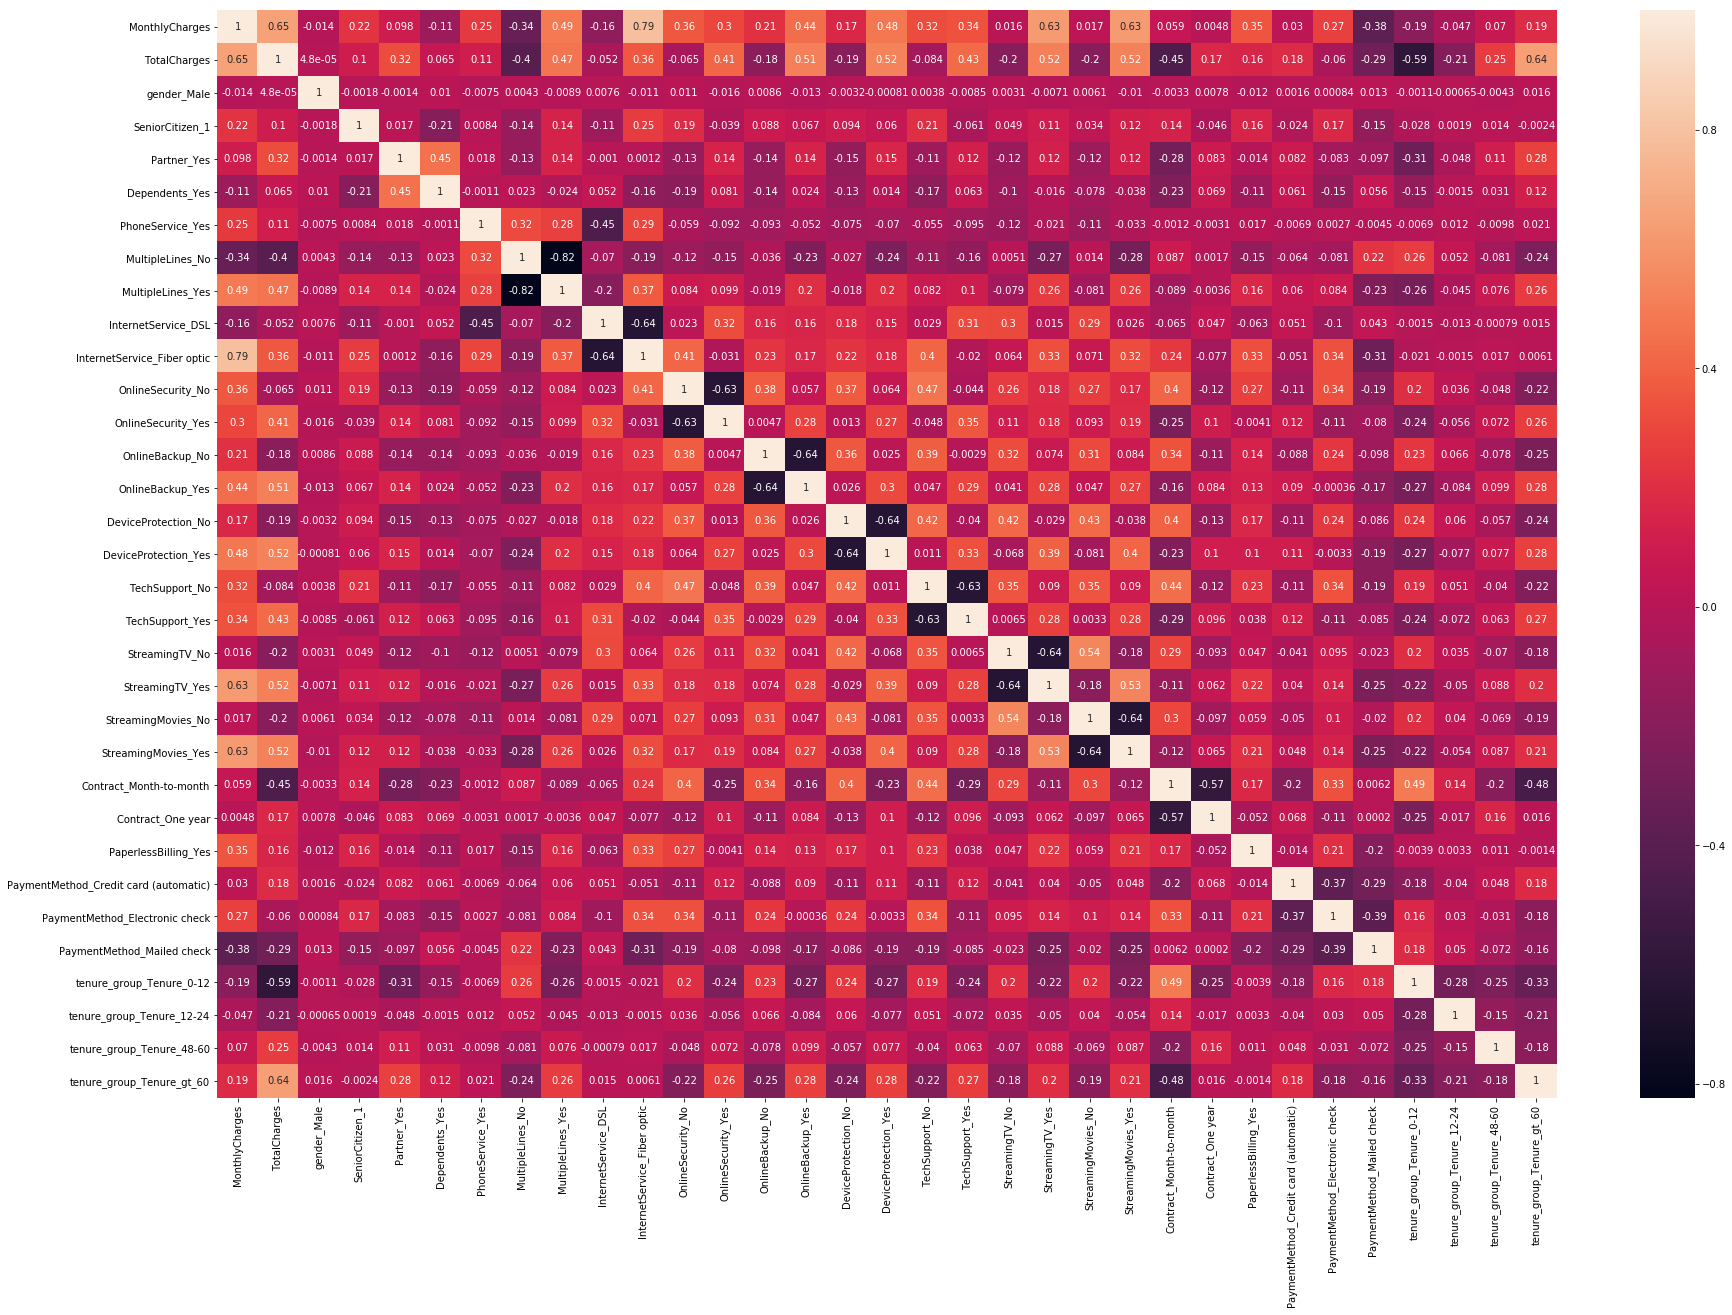

In [353]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

#### Logistic Regression feature ranking

In [25]:
# Construct our Logistic Regression model
lr = LogisticRegression(random_state=100)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)

Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 featur

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=1, step=1, verbose=3)

In [32]:
feature_ranking=pd.DataFrame((zip(X.columns,rfe.ranking_)))
feature_ranking.columns=['Feature','Rank']
feature_ranking.sort_values(by='Rank')

,Feature,Rank
23,Contract_Month-to-month,1
24,Contract_One year,2
29,tenure_group_Tenure_0-12,3
0,MonthlyCharges,4
6,PhoneService_Yes,5
18,TechSupport_Yes,6
11,OnlineSecurity_No,7
1,TotalCharges,8
9,InternetService_DSL,9
27,PaymentMethod_Electronic check,10


In [37]:
lr = LogisticRegression(random_state=100)
lr.fit(X / np.std(X, 0), y)
print(lr.coef_)

[[ 1.12077509e+00 -2.30940972e-01 -1.49090684e-02  8.08786654e-02
  -1.14790408e-02 -6.33398113e-02 -2.89123996e-01 -1.16625380e-01
  -5.50317386e-02 -6.83590222e-02 -5.35837226e-02  5.78013212e-02
  -1.94546847e-01  1.45240107e-02 -1.39425002e-01 -1.90544752e-02
  -1.04433714e-01  4.76953077e-02 -1.82696814e-01 -4.13181078e-02
  -7.98163968e-02 -4.31707870e-02 -7.78762915e-02  8.00258070e-01
   3.44741482e-01  1.59905250e-01 -3.47702947e-02  1.48376531e-01
  -1.77060368e-04  4.93377541e-01  7.87306799e-02 -2.55730422e-02
  -8.78005873e-02]]


### Feature Selection using RFE

Optimal number of features : 12


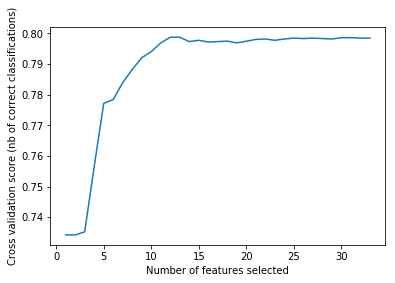

In [354]:
# Selecting the optimal number of variables using RFE CV gridsearch

# Create the RFE object and compute a cross-validated score.
from sklearn.model_selection import StratifiedKFold
lr=LogisticRegression(random_state=100)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [355]:
logreg = LogisticRegression()
rfe = RFE(logreg,12)             # running RFE with 12 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True False False False False  True False False  True False  True
 False False  True False False False  True False False False False  True
  True  True False  True False  True False False False]
[ 1  1 19  2 20  7  1  3  4  1 18  1  8 17  1 21  9 10  1 15 14 13 12  1
  1  1 11  1 22  1  5 16  6]


In [356]:
cols=X_train.columns[rfe.support_]
cols

Index(['MonthlyCharges', 'TotalCharges', 'PhoneService_Yes',
       'InternetService_DSL', 'OnlineSecurity_No', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'PaperlessBilling_Yes', 'PaymentMethod_Electronic check',
       'tenure_group_Tenure_0-12'],
      dtype='object')

In [357]:
# Let's run the model using the selected variables
logsk = LogisticRegression()
logsk.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [358]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.2
Date:                Sat, 22 Jun 2019   Deviance:                       4056.4
Time:                        17:30:14   Pearson chi2:                 4.98e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4337      0.265     -9.195      0.000      -2.952      -1.915
MonthlyCharges                     0.9249      0.078     11.859      0.000       0.772       1.078
TotalCharges                      -0.3873      0.082     -4.745      0.000      -0.547      -0.227
PhoneService_Yes                  -0.8657      0.158     -5.492      0.000      -1.175      -0.557
InternetService_DSL               -0.2606      0.111     -2.351      0.019      -0.478      -0.043
OnlineSecurity_No                  0.5077      0.095      5.323      0.000       0.321       0.695
OnlineBackup_Yes                  -0.2925      0.094     -3.127      0.002      -0.476      -0.109
TechSupport_Yes                   -0.4980      0.104     -4.800      0.000      -0.701      -0.295
Contract_Month-to-month            1.7040      0.205      8.303      0.000       1.302       2.106
Contract_One year                  0.8449      0.208      4.058      0.000       0.437       1.253
PaperlessBilling_Yes               0.3321      0.090      3.710      0.000       0.157       0.508
PaymentMethod_Electronic check     0.3541      0.083      4.264      0.000       0.191       0.517
tenure_group_Tenure_0-12           0.8508      0.111      7.687      0.000       0.634       1.068
==================================================================================================
"""

### Variation Inflation Factor 

In [359]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [360]:
cols_drop=list(set(X_train.columns)-set(cols))+['customerID']
# Calculating Vif value
vif_cal(input_data=telecom.drop(cols_drop, axis=1), dependent_col='Churn')

,Var,Vif
1,TotalCharges,3.96
0,MonthlyCharges,2.83
6,TechSupport_Yes,0.25
8,Contract_One year,0.24
2,PhoneService_Yes,0.16
11,tenure_group_Tenure_0-12,0.15
4,OnlineSecurity_No,0.14
5,OnlineBackup_Yes,0.11
3,InternetService_DSL,0.10
7,Contract_Month-to-month,0.05


VIF for all the variables are within the acceptable range

### Making Predictions

In [361]:
y_pred=logsk.predict_proba(X_test[cols])
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.559210,0.440790
1,0.617448,0.382552
2,0.980603,0.019397
3,0.335568,0.664432
4,0.986142,0.013858


In [362]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,939,0.440790
1,1,3724,0.382552
2,0,1756,0.019397
3,1,2278,0.664432
4,0,1867,0.013858


In [363]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final['Churn_Prob'].apply( lambda x: 1 if x > 0.5 else 0)

### Model Evaluation 

In [364]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1381,  147],
       [ 285,  297]])

In [365]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.795260663507109

In [366]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [367]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8289315726290516

In [368]:
# Let us calculate specificity
TN / float(TN+FP)

0.668918918918919

In [369]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.3310810810810811


In [370]:
# positive predictive value 
print (TP / float(TP+FP))

0.9037958115183246


In [371]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5103092783505154


In [372]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

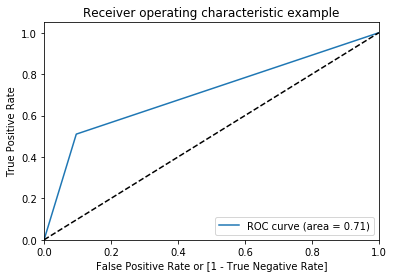

(array([0.        , 0.09620419, 1.        ]),
 array([0.        , 0.51030928, 1.        ]),
 array([2, 1, 0]))

In [373]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

In [374]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,939,0.440790,0,1,1,1,1,1,0,0,0,0,0
1,1,3724,0.382552,0,1,1,1,1,0,0,0,0,0,0
2,0,1756,0.019397,0,1,0,0,0,0,0,0,0,0,0
3,1,2278,0.664432,1,1,1,1,1,1,1,1,0,0,0
4,0,1867,0.013858,0,1,0,0,0,0,0,0,0,0,0


In [375]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  0.000000  1.000000
0.1   0.1  0.609953  0.481675  0.946735
0.2   0.2  0.704265  0.660995  0.817869
0.3   0.3  0.754976  0.757853  0.747423
0.4   0.4  0.786256  0.840969  0.642612
0.5   0.5  0.795261  0.903796  0.510309
0.6   0.6  0.786730  0.944372  0.372852
0.7   0.7  0.767299  0.973168  0.226804
0.8   0.8  0.736493  0.995419  0.056701
0.9   0.9  0.724171  1.000000  0.000000


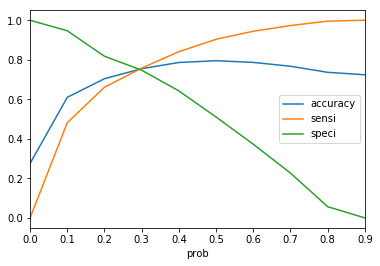

In [376]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [377]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [378]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,939,0.440790,0,1,1,1,1,1,0,0,0,0,0,1
1,1,3724,0.382552,0,1,1,1,1,0,0,0,0,0,0,1
2,0,1756,0.019397,0,1,0,0,0,0,0,0,0,0,0,0
3,1,2278,0.664432,1,1,1,1,1,1,1,1,0,0,0,1
4,0,1867,0.013858,0,1,0,0,0,0,0,0,0,0,0,0


In [379]:
#Let's check the overall accuracy.
test_accuracy=metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)
test_accuracy

0.7549763033175355

In [380]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1158,  370],
       [ 147,  435]])

#### Model Stability

In [385]:
y_pred_train=logsk.predict_proba(X_train[cols])
y_pred_df_train=pd.DataFrame(y_pred_train)

In [386]:
# Converting to column dataframe
y_pred_1_train = y_pred_df_train.iloc[:,[1]]

# Converting y_test to dataframe
y_train_df = pd.DataFrame(y_train)

# Putting CustID to index
y_train_df['CustID'] = y_train_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1_train.reset_index(drop=True, inplace=True)
y_train_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final_train = pd.concat([y_train_df,y_pred_1_train],axis=1)

# Renaming the column 
y_pred_final_train= y_pred_final_train.rename(columns={ 1 : 'Churn_Prob'})

In [387]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final_train['predicted'] = y_pred_final_train['Churn_Prob'].apply( lambda x: 1 if x > 0.3 else 0)

In [388]:
#Let's check the overall accuracy.
training_accuracy=metrics.accuracy_score(y_pred_final_train['Churn'], y_pred_final_train['predicted'])
training_accuracy

0.7700121901665989

In [392]:
print('The training accuracy (', training_accuracy, ') and the test accuracy(',test_accuracy,') are fairly close. Hence the model is stable.')


The training accuracy ( 0.7700121901665989 ) and the test accuracy( 0.7549763033175355 ) are fairly close. Hence the model is stable.


## Model Building: Tree Based Models

In [42]:
# Removing Null values from the original dataset
#Dropping rows with missing values
telecom_clean=telecom_orig[telecom_orig['TotalCharges']!=" "]

In [43]:
telecom_clean.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6530,2
top,1098-KFQEC,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,11,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,NaN,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,NaN,NaN


In [44]:
# Dividing dataset into id,target, numeric and categorical variables
id_col=['customerID']

target_col=['Churn']

num_cols=['tenure','MonthlyCharges', 'TotalCharges']

cat_cols=[i for i in telecom_orig.columns if i not in id_col+target_col+num_cols]

In [45]:
# apply Label encoder to df_categorical
le=preprocessing.LabelEncoder()
telecom_clean[cat_cols]=telecom_clean[cat_cols].apply(le.fit_transform)
telecom_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [46]:
# convert target variable income to categorical
telecom_clean['Churn']=telecom_clean['Churn'].astype('category')
telecom_clean['TotalCharges']=telecom_clean['TotalCharges'].astype('float64')


In [47]:
telecom_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null category
dtypes: category(1), float64(2), int64(17), o

#### Splitting dataset into Train and Test sets

In [48]:
X=telecom_clean.drop(['customerID','Churn'], axis=1)
y=telecom_clean['Churn']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=100)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4922, 19)
(4922,)
(2110, 19)
(2110,)


### Decision Tree Classification

In [82]:
#building the tree
dt=DecisionTreeClassifier(max_depth=4, min_samples_split=100, min_samples_leaf=50, criterion="gini")

#Fitting the tree to  our data
dt.fit(X_train, y_train)

#PREDICTING 
y_pred=dt.predict(X_test)

print(classification_report(y_test,y_pred))
print('The accuracy score is:' + str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.79      0.93      0.86      1528
         Yes       0.67      0.37      0.48       582

   micro avg       0.78      0.78      0.78      2110
   macro avg       0.73      0.65      0.67      2110
weighted avg       0.76      0.78      0.75      2110

The accuracy score is:0.7753554502369668
[[1421  107]
 [ 367  215]]


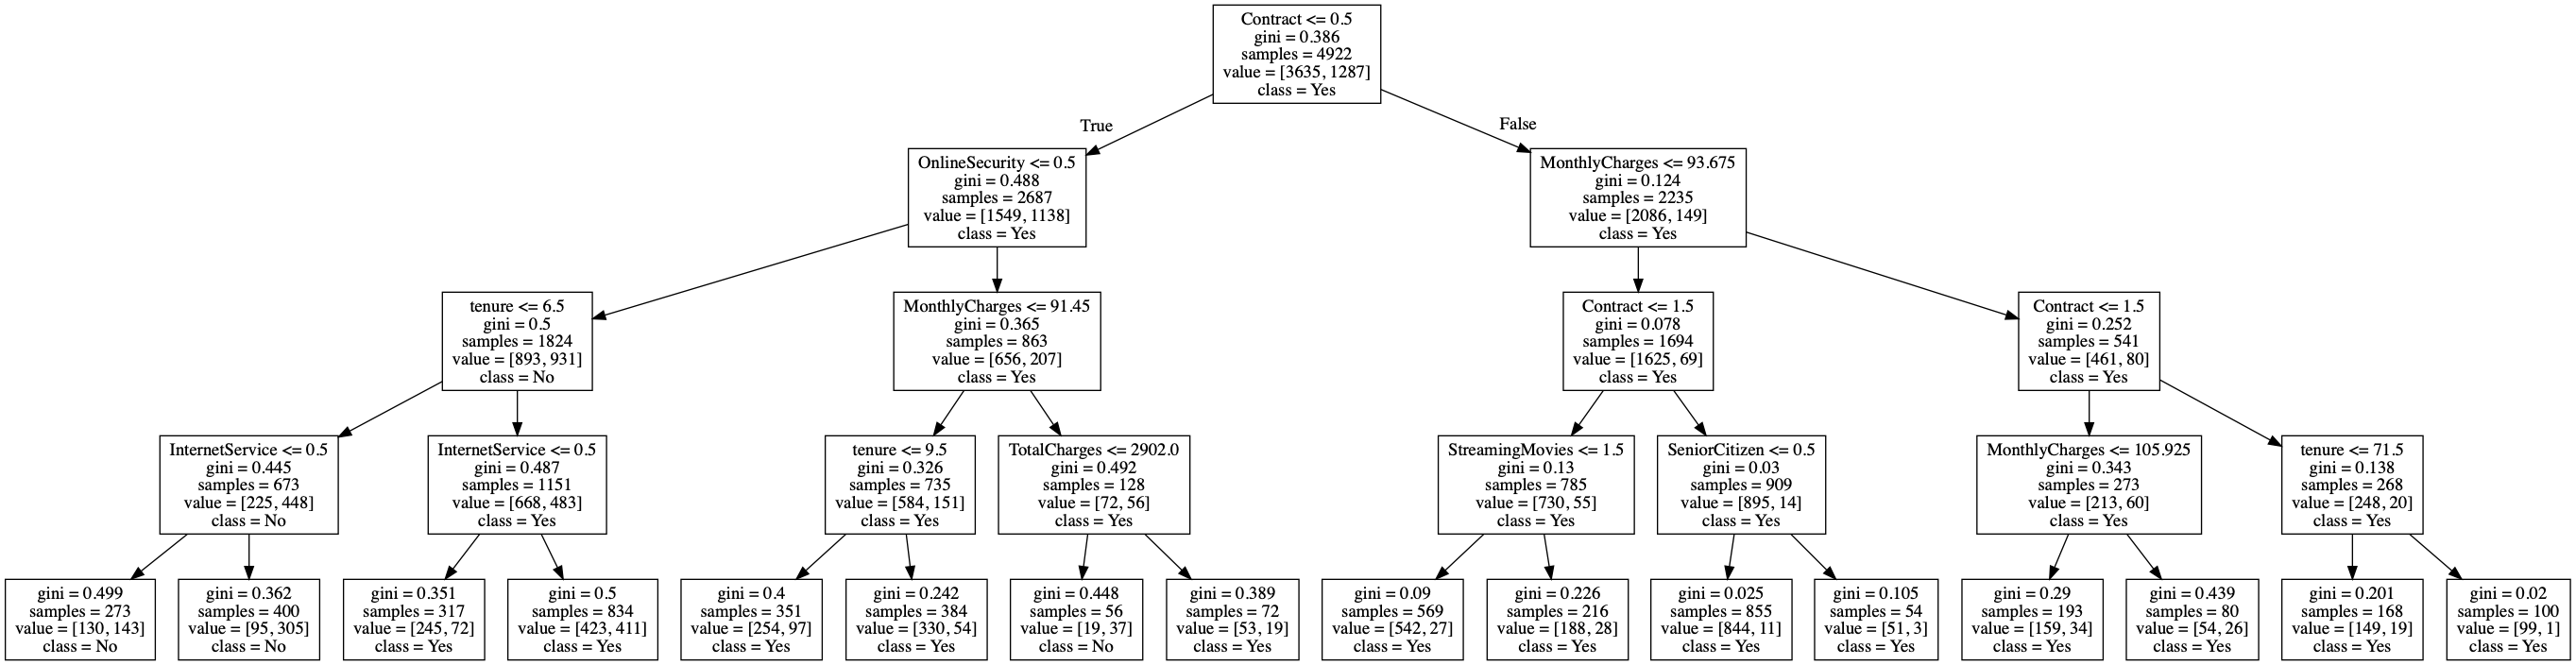

In [83]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['Yes','No'])
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Random Forest Classification

In [50]:
# Running the random forest with default parameters.
rfc=RandomForestClassifier()

In [85]:
# Predicting using default Parameters
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
# Making predictions using the default model
y_pred=rfc.predict(X_test)

In [87]:
# Classification report of the default model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1528
         Yes       0.64      0.46      0.54       582

   micro avg       0.78      0.78      0.78      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [88]:
#Checking accuracy score and confusion matrix

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1375  153]
 [ 312  270]]
0.7796208530805687


In [89]:
print('The default model has an accuracy score of', accuracy_score(y_test, y_pred))

The default model has an accuracy score of 0.7796208530805687


#### Hyperparameter Tuning

In [90]:
def hp_gridSearch(parameter, Range, n_folds):
    
    #parameters to build the model on
    parameters={ parameter: Range}

    #instantiate the model
    rf=RandomForestClassifier()

    rf= GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy')

    rf.fit(X_train, y_train)
    scores=pd.DataFrame(rf.cv_results_)
    display(scores.head())
    
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+parameter], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores["param_"+parameter], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(parameter)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()    

#### Max features

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.029842,0.003701,0.003866,0.000549,2,{'max_features': 2},0.775883,0.800244,0.785627,0.786585,0.776829,0.774115,0.783218,0.008987,6,0.980736,0.979030,0.979761,0.983910,0.980497,0.980502,0.980739,0.001530
1,0.028540,0.000612,0.003314,0.000117,3,{'max_features': 3},0.790499,0.785627,0.774665,0.773171,0.789024,0.791209,0.784031,0.007376,5,0.980736,0.985369,0.978786,0.978791,0.982691,0.983427,0.981633,0.002425
2,0.039072,0.003280,0.003978,0.000304,4,{'max_features': 4},0.795371,0.807552,0.767357,0.786585,0.782927,0.785104,0.787485,0.012234,2,0.983906,0.982443,0.977323,0.980254,0.981229,0.976359,0.980252,0.002672
3,0.040591,0.004329,0.003833,0.000432,5,{'max_features': 5},0.794153,0.788063,0.791717,0.793902,0.802439,0.792430,0.793783,0.004357,1,0.980249,0.980980,0.978786,0.981229,0.983423,0.981233,0.980983,0.001381
4,0.048932,0.002525,0.004197,0.000266,6,{'max_features': 6},0.781973,0.796590,0.784409,0.784146,0.792683,0.785104,0.787485,0.005270,2,0.984394,0.980736,0.979761,0.982935,0.982448,0.979771,0.981674,0.001720


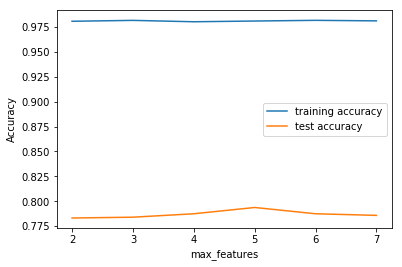

In [91]:
hp_gridSearch(parameter='max_features', Range=range(2,8,1), n_folds=6)

#### Max Depth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.019359,0.001399,0.003284,0.000369,2,{'max_depth': 2},0.746650,0.758831,0.771011,0.764634,0.780488,0.776557,0.766355,0.011354,6,0.746403,0.769325,0.775421,0.776207,0.765236,0.765781,0.766395,0.009897
1,0.016444,0.000284,0.002576,0.000031,3,{'max_depth': 3},0.789281,0.788063,0.771011,0.778049,0.801220,0.782662,0.785047,0.009489,5,0.795416,0.793465,0.794197,0.784739,0.788396,0.793322,0.791589,0.003766
2,0.017944,0.000560,0.002643,0.000069,4,{'max_depth': 4},0.796590,0.805116,0.780755,0.800000,0.808537,0.800977,0.798659,0.008865,4,0.794928,0.801756,0.803219,0.799854,0.799366,0.799659,0.799797,0.002564
3,0.022725,0.002010,0.003367,0.000066,5,{'max_depth': 5},0.794153,0.829476,0.789281,0.790244,0.806098,0.793651,0.800488,0.014082,2,0.805901,0.811753,0.811753,0.815700,0.809361,0.810383,0.810809,0.002946
4,0.025802,0.002253,0.003415,0.000336,6,{'max_depth': 6},0.795371,0.812424,0.792935,0.802439,0.801220,0.797314,0.800284,0.006325,3,0.821995,0.821263,0.818093,0.824963,0.818869,0.819644,0.820805,0.002286


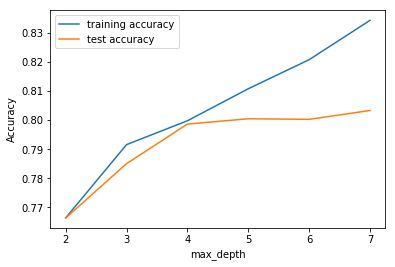

In [92]:
hp_gridSearch(parameter='max_depth', Range=range(2,8,1), n_folds=6)

#### Min Samples Split

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.026317,0.003130,0.003420,0.000384,100,{'min_samples_split': 100},0.809988,0.808770,0.786845,0.796341,0.801220,0.810745,0.802316,0.008640,1,0.821019,0.820044,0.821263,0.821550,0.816675,0.819644,0.820033,0.001644
1,0.019436,0.000527,0.002694,0.000045,200,{'min_samples_split': 200},0.807552,0.808770,0.777101,0.796341,0.813415,0.802198,0.800894,0.011917,2,0.804682,0.809315,0.807120,0.804729,0.807411,0.802340,0.805933,0.002271
2,0.018788,0.000957,0.002742,0.000275,300,{'min_samples_split': 300},0.794153,0.817296,0.785627,0.784146,0.803659,0.800977,0.797643,0.011347,3,0.797366,0.798586,0.803706,0.795222,0.804729,0.799659,0.799878,0.003364
3,0.021258,0.000462,0.003289,0.000097,400,{'min_samples_split': 400},0.778319,0.801462,0.777101,0.784146,0.800000,0.776557,0.786266,0.010532,6,0.792733,0.795660,0.801756,0.791565,0.800341,0.794541,0.796099,0.003753
4,0.022191,0.000781,0.003566,0.000319,500,{'min_samples_split': 500},0.790499,0.802680,0.774665,0.775610,0.817073,0.781441,0.790329,0.015322,4,0.798586,0.802000,0.786150,0.791565,0.794490,0.785767,0.793093,0.005995


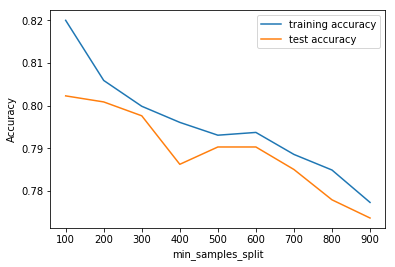

In [93]:
hp_gridSearch(parameter='min_samples_split', Range=range(100,1000,100), n_folds=6)

#### Min Samples Leaf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.028369,0.003083,0.003541,0.000501,20,{'min_samples_leaf': 20},0.806334,0.808770,0.788063,0.798780,0.803659,0.810745,0.802722,0.007587,1,0.819312,0.819556,0.819312,0.823013,0.820575,0.820375,0.820357,0.001286
1,0.020688,0.000352,0.002773,0.000103,40,{'min_samples_leaf': 40},0.802680,0.807552,0.788063,0.795122,0.803659,0.804640,0.800284,0.006646,2,0.808339,0.810778,0.815899,0.814481,0.807167,0.810626,0.811215,0.003104
2,0.021621,0.002227,0.002951,0.000336,60,{'min_samples_leaf': 60},0.794153,0.805116,0.790499,0.793902,0.810976,0.802198,0.799472,0.007205,3,0.802487,0.805169,0.811997,0.807899,0.806192,0.807458,0.806867,0.002894
3,0.023170,0.000587,0.003349,0.000108,80,{'min_samples_leaf': 80},0.800244,0.808770,0.784409,0.790244,0.807317,0.803419,0.799065,0.008901,4,0.803219,0.805657,0.807120,0.808386,0.805705,0.804046,0.805689,0.001738
4,0.022737,0.000888,0.003480,0.000271,100,{'min_samples_leaf': 100},0.797808,0.808770,0.777101,0.792683,0.801220,0.793651,0.795205,0.009694,6,0.803463,0.801268,0.802243,0.800341,0.802779,0.799171,0.801544,0.001463


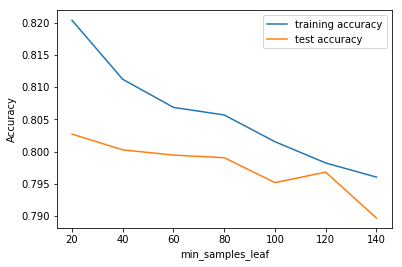

In [94]:
hp_gridSearch(parameter='min_samples_leaf', Range=range(20,160,20), n_folds=6)

#### N estimators

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,1.593250,0.086893,0.084482,0.009422,500,{'n_estimators': 500},0.801462,0.807552,0.792935,0.802439,0.801220,0.802198,0.801300,0.004306,1,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
1,2.047523,0.033201,0.117163,0.006768,700,{'n_estimators': 700},0.797808,0.808770,0.790499,0.802439,0.797561,0.798535,0.799269,0.005522,4,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
2,2.814944,0.180853,0.159696,0.021479,900,{'n_estimators': 900},0.792935,0.813642,0.790499,0.804878,0.797561,0.798535,0.799675,0.007722,3,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
3,3.156180,0.170029,0.171954,0.013622,1100,{'n_estimators': 1100},0.799026,0.808770,0.792935,0.806098,0.798780,0.802198,0.801300,0.005183,1,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461
4,3.908604,0.227429,0.211804,0.010000,1300,{'n_estimators': 1300},0.800244,0.805116,0.792935,0.801220,0.798780,0.796093,0.799065,0.003855,5,0.998537,0.998537,0.997318,0.997806,0.997562,0.997806,0.997928,0.000461


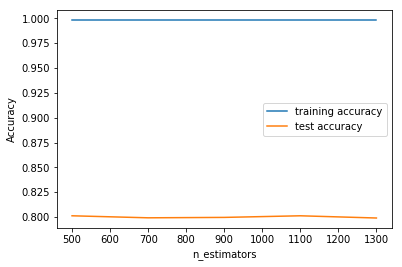

In [96]:
hp_gridSearch(parameter='n_estimators', Range=range(500,1500,200), n_folds=6)

#### Overall Optimal Parameters

In [97]:
def hp_optimalGridSearch(parameter, Range, n_folds):
    
    #parameters to build the model on
    parameters=dict(zip(parameter, Range))

    #instantiate the model
    rf=RandomForestClassifier()

    grid_search= GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy', n_jobs = -1,verbose = 1)

    grid_search.fit(X_train, y_train)
   
    # printing the optimal accuracy score and hyperparameters
    print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [98]:
hp_optimalGridSearch(parameter=['max_features','max_depth','min_samples_split','min_samples_leaf','n_estimators'],
                     Range=[[4,5,6],[3,4,5,6],[200,300,500,600],[80,120],[1500]],
                    n_folds=6)

Fitting 6 folds for each of 96 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:  5.3min finished


We can get accuracy of 0.7988622511174319 using {'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 120, 'min_samples_split': 200, 'n_estimators': 1500}


### Fitting the model with the optimal hyperparameters

In [51]:
# model with the best hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=120, 
                             min_samples_split=200,
                             max_features=6,
                             n_estimators=1500)

In [52]:
# fit
rfc.fit(X_train,y_train)

# predict
predictions = rfc.predict(X_test)

In [53]:
print(confusion_matrix(y_test,predictions))

[[1408  120]
 [ 318  264]]


In [54]:
print(accuracy_score(y_test, predictions))

0.7924170616113744


In [55]:
train_predictions=rfc.predict(X_train)
print(accuracy_score(y_train, train_predictions))

0.8027224705404307


### Feature Importance

In [56]:
# predictors
features = X.columns

# feature_importance
importance = rfc.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 99.99999999999994


,variables,importance_percentage
0,Contract,29.276605
1,tenure,16.106668
2,OnlineSecurity,12.600357
3,TechSupport,12.320279
4,MonthlyCharges,8.240739
5,TotalCharges,7.242448
6,InternetService,5.236534
7,OnlineBackup,3.768198
8,DeviceProtection,1.664280
9,PaymentMethod,1.015654


## Business Insights

 The top 5 important attributes are:
- **Contract** : Customers who are not in a contract with the company are more likely to Churn. Customers with a monthly contract are most likely to Churn. Customers with a longer contract(2 years) are less likely to leave the telecom service.
- **Tenure** : Customers with Tenure between 0-12 years are most likely to Churn. 
    The probability of Churning reduces as Tenure increases.
- **Online Security** : The company should focus on on improving their online Security measures. 
- **Tech Support** : Tech Support services must be improved to lower Churn 
- **Monthly Charges** : High Monthly charges are positively related to the probability of Churn. Affordable Plan rates should be introduced to reduce the probability of Churn